### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_superhosts`
- Team Leader and Team Member 1: `Felix Rosenberger`
- Team Member 2: `John Rizk`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from xgboost import cv
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Task 1 code here
# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# read in data
trainpath = "train.csv"
train = pd.read_csv(trainpath)
testpath = "test.csv"
test = pd.read_csv(testpath)

# concatenate dataframes to reduce redundancies in operations
df = pd.concat([train, test])

In [ ]:
# types of variables / features
vtypes = df.dtypes.to_frame()
#vtypes.value_counts()
vtypes

In [ ]:
# data summary and characteristics
df.describe()

In [ ]:
# missing values total
total_miss = df.isna().sum()
total_miss.to_frame()
total_miss = total_miss.reset_index()
total_miss.rename(columns={0:"total"}, inplace=True)
#total_miss.loc[total_miss["total"] > 0]

In [ ]:
# missing values train
train_miss = train.isna().sum()
train_miss.to_frame()
train_miss = train_miss.reset_index()
train_miss.rename(columns={0:"train"}, inplace=True)
#train_miss.loc[train_miss["train"] > 0]

In [ ]:
# missing values test
test_miss = test.isna().sum()
test_miss.to_frame()
test_miss = test_miss.reset_index()
test_miss.rename(columns={0:"test"}, inplace=True)
#test_miss.loc[test_miss["test"] > 0]

In [ ]:
df.columns[df.isnull().any()]

In [ ]:
train.columns[train.isnull().any()]

In [ ]:
test.columns[test.isnull().any()]

In [ ]:
train_miss.set_index("index", drop=True, inplace=True)
test_miss.set_index("index", drop=True, inplace=True)
total_miss.set_index("index", drop=True, inplace=True)
train_miss.join([test_miss, total_miss])

`(Task 1, Text Here)`
### Forecasting Problem
The goal is to predict daily rental prices of Melbourne located AirBnB listings. This information could be used, for example, to assess the rental price a property with specific characteristics in certain suburbs is expected to yield. Especially in a business case scenario, where these cashflows might be used to pay off debt, this is a critical aspect for feasability assessment. In addition, people interested in building properties specifically for renting them on the platform would want to know which property characteristics lead to the highest prices and the analysis of the data reveals such patterns.

### Evaluation Criteria
The criteria to assess prediction performance is RMSE. This performance metric measures the average distance between predictions obtained by a model and actual target values. Thus, the lower the distance (and the smaller RMSE), the better the prediction quality. It also has the advantage of being in the same unit as the predicted variable which makes it easy to interpret.

### Types of Variables / Features
The 61 variables consist of various types which can be categorised as follows.
#### Categorical
##### Nominal
source  
name  
description  
neighborhood_overview  
host_name  
host_location  
host_about  
host_is_superhost  
host_neighbourhood  
host_verifications  
host_has_profile_pic  
host_identity_verified  
neighbourhood  
neighbourhood_cleansed  
amenities  
has_availability  
number_of_reviews_l30d  
instant_bookable  

##### Ordinal
host_response_time  
property_type  
room_type  


#### Numerical
ID  
host_since  
host_response_rate  
host_acceptance_rate  
host_listings_count  
latitude  
longitude  
accommodates  
bathrooms  
bedrooms  
beds  
minimum_nights  
maximum_nights  
minimum_minimum_nights  
maximum_minimum_nights  
minimum_maximum_nights  
maximum_maximum_nights  
minimum_nights_avg_ntm  
maximum_nights_avg_ntm  
availability_30  
availability_60  
availability_90  
availability_365  
number_of_reviews  
number_of_reviews_ltm  
first_review  
last_review  
review_scores_rating  
review_scores_accuracy  
review_scores_cleanliness  
review_scores_checkin  
review_scores_communication  
review_scores_location  
review_scores_value  
calculated_host_listings_count  
calculated_host_listings_count_entire_homes  
calculated_host_listings_count_private_rooms  
calculated_host_listings_count_shared_rooms  
reviews_per_month  
price  

### Data Summary and Main Data Characteristics
This dataset contains all relevant information and characteristics of Airbnb listings.

### Missing Values



---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [ ]:
## Task 2, Question 1 Code Here
# convert host response rate to decimal
df.host_response_rate = df.host_response_rate.str.rstrip('%').astype('float') / 100

For the variable `host_response_rate`, the percentage values (which are in string format) are converted to decimals by stripping away the percentage sign and converting the value to a float subsequently.

In [ ]:
# convert host acceptance rate to decimal
df.host_acceptance_rate = df.host_acceptance_rate.str.rstrip('%').astype('float') / 100

For the variable `host_acceptance_rate`, the percentage values (which are in string format) are converted to decimals by stripping away the percentage sign and converting the value to a float subsequently.

In [ ]:
# remove strings from bathroom variable
df.bathrooms = pd.to_numeric(df.bathrooms.str.replace(r'[^0-9\.]', ''), errors='coerce')

For the variable `bathrooms`, the values consist of a number and a string. Hence the strings are stripped away using regular expressions and the remaining values are converted to float. Because there were empty values which resulted in an error when converting to float, the errors parameter was used while converting to make sure these values would be set to NaN instead.

In [ ]:
# remove dollar sign from price
df.price = df.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')

The variable `price` contained dollar signs and commas and was also not in numerical format. Hence these issues have been fixed using with the `str.replace` method.

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [ ]:
# create column sum of amenities
#df8 = pd.read_csv("df_7.csv")
## convert column values to list
#df8.amenities = df8.amenities.str.strip('][').str.replace('"', '').str.split(', ')
#
## create new column with sum of items in each list
#df8["sum_amenities"] = df8.amenities.apply(lambda x: len(x))
#
#df8.drop(['amenities'], axis=1, inplace=True)

In [ ]:
#df8.to_csv("df_8.csv")

`(Task 2, Question 2 Text Here)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [ ]:
## Task 2, Question 3 Code Here

`(Task 2, Question 3 Text Here)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [ ]:
## Task 2, Question 4 Code Here

`(Task 2, Question 4 Text Here)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [ ]:
# feature scaling

`(Task 2, Question 5 Text Here)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [ ]:
df9 = pd.read_csv("df_7.csv")
df9.drop(["latitude", "longitude", "source_previous scrape"], axis=1, inplace=True)
df9.to_csv("df_9.csv")

In [ ]:
df9.head()

In [ ]:
df9.describe()

In [ ]:
df9.columns

#### Univariate EDA

In [ ]:
df9[['host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     'review_scores_rating', 'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

price heavily influences the overall picture.

In [ ]:
df9[['host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

Still a few distortions, let's look at the variables with large magnitude only.

In [ ]:
df9[['host_since', #'host_response_rate',
       #'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
     'minimum_nights', 'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price', 'amenity_count'
    ]].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', #'host_response_rate',
       #'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
     'minimum_nights', 'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price', 'amenity_count'
    ]].plot.box(vert = False, grid = True);

It is clear that there a few listings which have extremely large minimum nights restrictions. Let's have a look.

In [ ]:
df9.loc[df9.minimum_nights > 150]

Now let's look at variables with lower magnitude.

In [ ]:
df9[[#'host_since', 
    'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', 
    'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 
     'log_price',
       #'amenity_count'
]].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', 
    'host_response_rate', #'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
      # 'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.box(vert = False, grid = True);

In [ ]:
df9.loc[df9.host_response_rate < 0.2].price.mean()

In [ ]:
df9.loc[df9.host_response_rate >= 0.2].price.mean()

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', #'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    'bathrooms', #'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    #'bathrooms', 
    'bedrooms', #'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    #'bathrooms', 
    #'bedrooms', 
    'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

#### Bivariate EDA

##### Correlation Matrix

In [ ]:
corr = df9[['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'email', 'phone', 'work_email',
       'amenity_count', 'smoke_alarm', 'kitchen', 'essentials', 'hangers',
       'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 'price', 'log_price']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

##### Interpretation
`host_since, host_response_time, host_response_rate, host_acceptance_rate, and host_listings_count`\
do not seem related to any other variables. Likely that they should be dropped.\
`Room Type`\
negative correlation of -0.49 with log price --> larger rooms are encoded with smaller integers. Hence correlation indicates that large / more private room types correlate with higher prices. Interestingly the relationship becomes irrelevant for non-log prices.\
`accommodates, bathrooms, bedrooms, beds`\
very strong correlation. This has to be analysed further to avoid multicollinearity down the line. accommodates and bedrooms have strongest positive correlation with log price out of those four.\
`minimum_nights and maximum_nights`\
do not seem related to any other variables. Likely that they should be dropped.\
`availability_30, availability_60, availability_90, and availability_365`\
There seems to be some relation with log price. Out of those, availability_30 seems to have strongest relation. Others should likely be dropped due to multicollinearity.\
`review_scores_rating, email, phone, work_email, smoke_alarm, kitchen, essentials, hangers, wifi, host_is_superhost_t, host_has_profile_pic_t, host_identity_verified_t, and has_availability_t`\
These seem all unrelated to both log price and price.\
`instant_bookable_t, property_type, neighbourhood_cleansed, and sum_amenities`\
These seem to have weak but existent relationship with log prices. instant_bookable and sum_amenities are positively related while property_type and neighbourhood_cleansed have a negative relationship. Thus, for property types the same logic applies as for room types and they might capture similar information. In the case of neighbourhood_cleansed it implies that the more listings exist in a suburb in the data, the higher its prices seem to be. Even though this is probably a weak relationship, but due to the construction of the neighbourhood encoding it seems to be the case. Further analysis is required with respect to individual suburbs as predictors of price.

NOTE: All correlations of prices with categorical data should be taken cautiously as the pearson correlation coefficient might not be suitable for those variables.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 15))
# Plotting the heatmap with respect to the correlation of the features with the target variable
sns.heatmap(df9.corr()[['log_price']].sort_values(by='log_price', ascending=False), annot=True, cmap='viridis');

In [ ]:
#continuous_features = [col for col in data.columns if data[col].dtype != 'O']
#for col in continuous_features:
#      data_copy = data.copy()
#      if 0 in data_copy[col].unique():
#            pass
#       else:
#            data_copy[col] = np.log(data_copy[col])
#            data_copy['SalePrice'] = np.log(data_copy['SalePrice'])
#            plt.scatter(data_copy[col], data_copy['SalePrice'])
#            plt.xlabel(col)
#            plt.ylabel('SalePrice')

##### Price vs Room Type

In [ ]:
df9.groupby('room_type').price.mean()

In [ ]:
import seaborn as sns

sns.scatterplot(x="room_type", y="price", data=df9, hue="room_type");

In [ ]:
sns.scatterplot(x="room_type", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="room_type", y="price", data=df9, hue="room_type");

In [ ]:
df9.room_type.value_counts()

In [ ]:
train = df9.iloc[0:7000,]
test = df9.iloc[7000:,]

In [ ]:
print(train.room_type.value_counts(normalize=True))
print(test.room_type.value_counts(normalize=True))

For room type 0 and 2 there seem to be a few outliers that skew the results of the mean prices in these groups. Also room types 1 and 3 are heavily underrepresented in the data across both training and test data.

##### Price vs accommodates

In [ ]:
df9.groupby('accommodates').price.mean()

In [ ]:
sns.scatterplot(x="accommodates", y="price", data=df9);

In [ ]:
sns.scatterplot(x="accommodates", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="accommodates", y="price", data=df9);

In [ ]:
df9.accommodates.value_counts(normalize=True)

In [ ]:
print(train.accommodates.value_counts(normalize=True))
print(test.accommodates.value_counts(normalize=True))

##### Price vs Bathrooms

In [ ]:
df9.groupby('bathrooms').price.mean()

In [ ]:
sns.scatterplot(x="bathrooms", y="price", data=df9);

In [ ]:
sns.scatterplot(x="bathrooms", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
df9.loc[df9.price > 100000]

In [ ]:
df9.bathrooms.value_counts(normalize=True)

##### Price vs Bedrooms

In [ ]:
df9.groupby('bedrooms').price.mean()

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df9);

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="bedrooms", y="price", data=df9);

In [ ]:
df9.bedrooms.value_counts(normalize=True)

##### Price vs availability

In [ ]:
sns.scatterplot(x="availability_30", y="price", data=df9);

In [ ]:
sns.scatterplot(x="availability_30", y="price", data=df9.loc[df9.price < 5000]);

##### Price vs sum_amenities

In [ ]:
sns.scatterplot(x="amenity_count", y="price", data=df9.loc[df9.price < 5000]);

`(Task 2, Question 6 Text Here)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [ ]:
df9 = pd.read_csv("df_9.csv")
test_ids = df9.ID.iloc[7000:].values # save IDs for later output
df9.drop(["Unnamed: 0", "ID", 'price', 'host_has_profile_pic_t','host_identity_verified_t'], axis=1, inplace=True)
y_train = df9['log_price'].iloc[:7000].values
#y_test = np.zeros(3000)
X_train = df9.drop(['log_price'], axis=1).iloc[:7000].values
X_test = df9.drop(['log_price'], axis=1).iloc[7000:].values

### Predictions after brute force missing value imputation

#### Random Forest Regressor

In [ ]:
#df9 = df9.head(7000)
#y = df9['log_price'].values.ravel()
#ts = 0.30; rs = 10
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = rs, stratify=None)

pipe_rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

pipe_rf.fit(X_train, y_train)

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print("Root Mean Squared Error:", rmse)

# calculate RMSE in original scale
#y_pred_dollar = np.exp(y_pred)
#y_test_dollar = np.exp(y_test)
#
#rmse = np.sqrt(mean_squared_error(y_test_dollar, y_pred_dollar))
#print(f'Root Mean Squared Error in AUD: {rmse}')

In [ ]:
#ts = 0.30; rs = 10
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = rs, stratify=None)

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


pipe_rf = make_pipeline(RandomForestRegressor(random_state=42))

pipe_rf.fit(X_train, y_train)

n_folds = 20
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)

In [ ]:
y_pred_dollar

In [ ]:
y_pred.shape

In [ ]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

In [ ]:
out

In [ ]:
df9.iloc[7000:,]

#### Random Forest Regressor Grid Search

In [ ]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# first let's do randomized grid search to narrow down parameter ranges
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# sample size per bootstrap sample
max_samples = [x for x in np.linspace(0.1, 1, num = 10)]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap,
               'randomforestregressor__max_samples': max_samples}
pprint(random_grid)

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

gs_random = RandomizedSearchCV(estimator = pipe, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 10,  
                               n_jobs = -1,
                               scoring = 'neg_mean_squared_error')
# Fit the random search model
gs_random.fit(X_train, y_train)
print(gs_random.best_estimator_)
print(gs_random.best_params_)
print(gs_random.best_score_)


In [ ]:
# narrow down optimal parameter values
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [50, 55],
    'randomforestregressor__max_features': [0.9, 1.0],
    'randomforestregressor__max_samples': [0.85, 0.9],
    'randomforestregressor__min_samples_leaf': [2, 3],
    'randomforestregressor__min_samples_split': [6, 8],
    'randomforestregressor__n_estimators': [1300, 1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [45, 50],
    'randomforestregressor__max_features': [0.85, 0.90],
    'randomforestregressor__max_samples': [0.80, 0.85],
    'randomforestregressor__min_samples_leaf': [3, 4],
    'randomforestregressor__min_samples_split': [5, 6],
    'randomforestregressor__n_estimators': [1400, 1500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [35, 40, 45],
    'randomforestregressor__max_features': [0.75, 0.80, 0.85],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [4, 5],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [25, 30, 35],
    'randomforestregressor__max_features': [0.65, 0.70, 0.75],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [3, 4],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [15, 20, 25],
    'randomforestregressor__max_features': [0.55, 0.60, 0.65],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [2, 3],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [25],
    'randomforestregressor__max_features': [0.40, 0.45, 0.50, 0.55],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [3],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# final model
pipe_rf = make_pipeline(RandomForestRegressor(random_state=42,
                                             max_depth=25, max_features=0.45,
                                             max_samples=0.85, min_samples_leaf=3,
                                             min_samples_split=3, n_estimators=1400,
                                             bootstrap=True))

pipe_rf.fit(X_train, y_train)

n_folds = 20
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)

In [ ]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

#### ExtraTreeRegressor

### Predictions after using MissForest RandomForestClassifier & Regressor for missing values imputation

In [3]:
df10 = pd.read_csv('missforest_imputed.csv')#.reset_index(names='ID')
df10.drop(['Unnamed: 0', 'price'], axis=1, inplace=True)
df10.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,accommodates,bathrooms,...,hangers,wifi,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,has_availability_t,instant_bookable_t,property_type,neighbourhood_cleansed,log_price
0,3719.0,1.0,1.00,0.98,2.0,-37.82030,144.99016,0.0,2.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,4.882802
1,4996.0,2.0,1.00,0.98,1.0,-37.76606,144.97951,2.0,2.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,5.0,3.663562
2,4193.0,2.0,1.00,0.78,2.0,-37.90546,145.39447,0.0,4.0,2.5,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,4.0,5.598422
3,4726.0,3.0,0.75,0.92,4.0,-37.82163,144.96672,2.0,2.0,2.5,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,6.907755
4,4697.0,2.0,1.00,0.87,1.0,-38.05725,145.33936,0.0,5.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,5.0,4.753590


#### Standardise Data

In [4]:
# check if all continuous features have more than 10 unique values
for column in df10.columns:
    if df10[column].nunique() < 10:
        print(column)

room_type
email
phone
work_email
smoke_alarm
kitchen
essentials
hangers
wifi
host_is_superhost_t
host_has_profile_pic_t
host_identity_verified_t
has_availability_t
instant_bookable_t
property_type
neighbourhood_cleansed


In [5]:
test_ids = df10.index[7000:].values # save IDs for later output
y_train = df10['log_price'].iloc[:7000].values
X_train = df10.drop(['log_price'], axis=1).iloc[:7000]
X_test = df10.drop(['log_price'], axis=1).iloc[7000:]

In [6]:
# Standardize continuous columns
# Initialize a StandardScaler object for feature standardization
scaler = StandardScaler()

X_train_std = X_train.copy()
X_test_std = X_test.copy()

# Iterate through columns
for column in X_train_std.columns:
    # Check if the column has more than 10 unique values (threshold for categorical variables)
    if X_train_std[column].nunique() > 10:
        # Fit the StandardScaler on the training data
        scaler.fit(X_train_std[column].values.reshape(-1, 1))
        # Apply feature standardization to both training and test data
        X_train_std[column] = scaler.transform(X_train_std[column].values.reshape(-1, 1))
        X_test_std[column] = scaler.transform(X_test_std[column].values.reshape(-1, 1))
        
# transform to numpy arrays
#X_train_std = X_train_std.values
#X_test_std = X_test_std.values

In [7]:
# Normalise continuous columns
# Initialize a StandardScaler object for feature standardization
norm_scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# Iterate through columns
for column in X_train_norm.columns:
    # Check if the column has more than 10 unique values (threshold for categorical variables)
    if X_train_norm[column].nunique() > 10:
        # Fit the StandardScaler on the training data
        norm_scaler.fit(X_train_norm[column].values.reshape(-1, 1))
        # Apply feature standardization to both training and test data
        X_train_norm[column] = norm_scaler.transform(X_train_norm[column].values.reshape(-1, 1))
        X_test_norm[column] = norm_scaler.transform(X_test_norm[column].values.reshape(-1, 1))
        
# transform to numpy arrays
#X_train_norm = X_train_norm.values
#X_test_norm = X_test_norm.values

#### XGBoost Regressor

In [8]:
def modelfit(alg, X_train, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
        
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, dtrain_predictions)))
                    
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)[:35]
    plt.subplots(figsize=(15, 12))
    feat_imp.plot.barh(title='Feature Importances')
    plt.xlabel('Feature Importance Score')
    return feat_imp


Model Report
RMSE : 0.1365


host_since                     1156.0
longitude                      1000.0
latitude                        956.0
availability_365                642.0
amenity_count                   592.0
host_acceptance_rate            530.0
number_of_reviews               508.0
host_listings_count             438.0
review_scores_value             432.0
number_of_reviews_ltm           432.0
review_scores_cleanliness       417.0
review_scores_rating            416.0
maximum_nights                  367.0
minimum_nights                  351.0
availability_30                 345.0
availability_60                 345.0
review_scores_location          328.0
review_scores_communication     312.0
review_scores_accuracy          305.0
availability_90                 294.0
review_scores_checkin           288.0
accommodates                    261.0
bedrooms                        207.0
host_response_rate              195.0
property_type                   170.0
bathrooms                       168.0
neighbourhoo

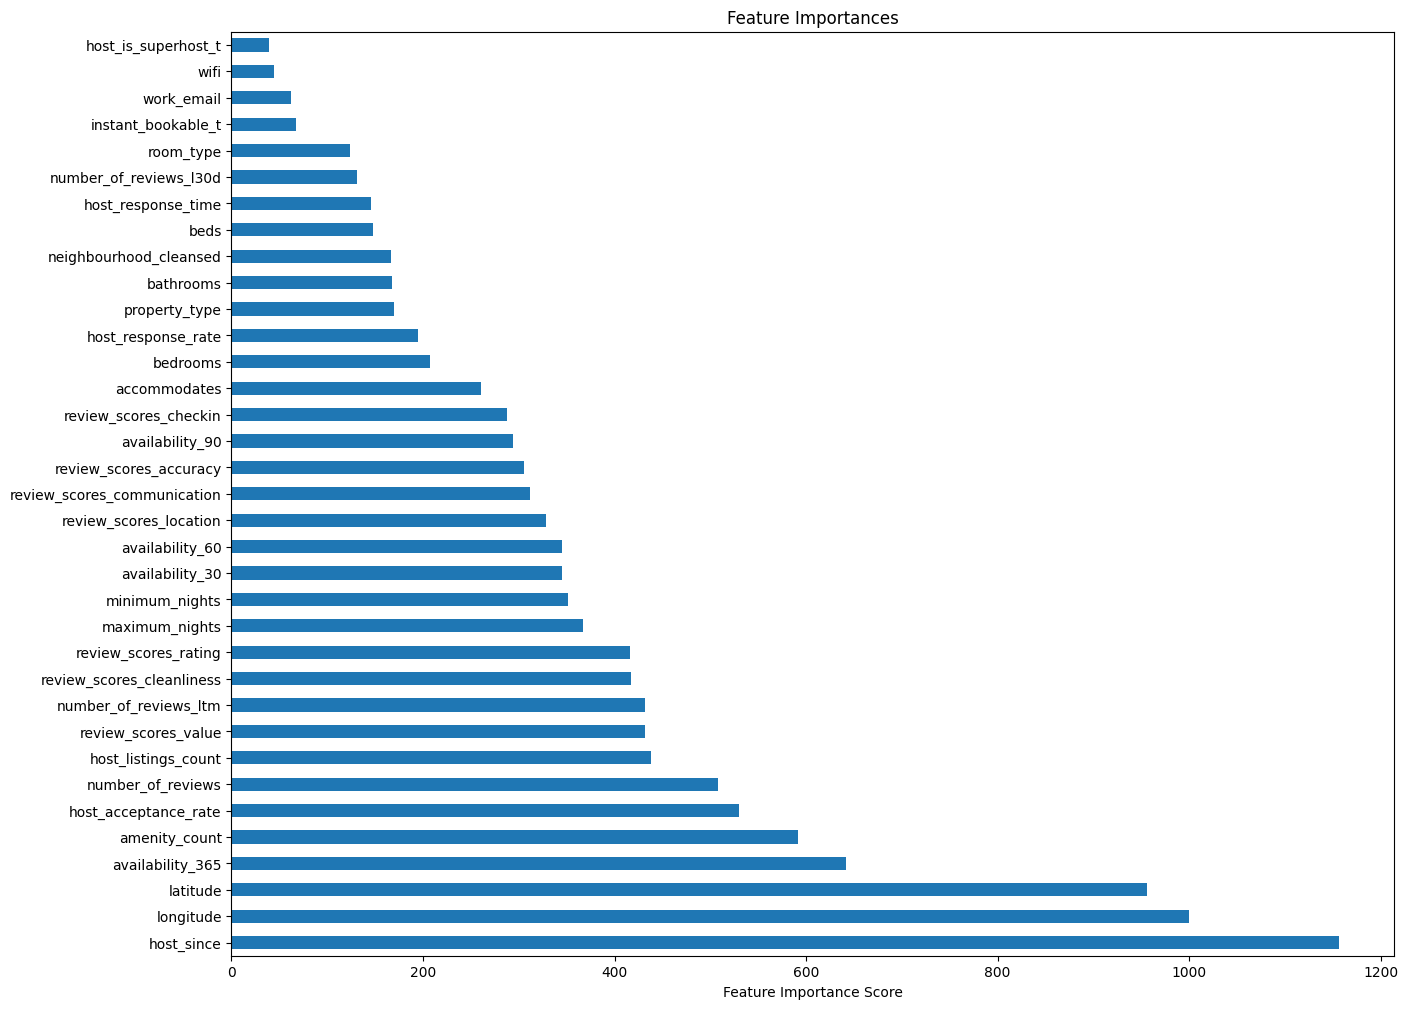

In [9]:
predictors = [x for x in X_train_std.columns]
target = y_train
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb1, X_train_std, predictors)

In [10]:
# selecting most important features
features = [
        'host_since',                 
        'longitude',                
        'latitude',                    
        'availability_365',            
        'amenity_count',               
        'host_acceptance_rate',        
        'number_of_reviews',           
        'host_listings_count',         
        'review_scores_value',         
        'number_of_reviews_ltm',       
        'review_scores_cleanliness',   
        'review_scores_rating',        
        'maximum_nights',              
        'minimum_nights',              
        'availability_30',             
        'availability_60',             
        'review_scores_location',      
        'review_scores_communication', 
        'review_scores_accuracy',      
        'availability_90',             
        'review_scores_checkin',       
        'accommodates',                
        'bedrooms',                    
        'host_response_rate',          
        #'property_type',               
        #'bathrooms',                   
        #'neighbourhood_cleansed',      
        #'beds',                        
        #'host_response_time',          
        #'number_of_reviews_l30d',      
        #'room_type'
]

X1_train = X_train_std.copy()
X1_test = X_test_std.copy()

for f in X_train_std.columns:
    if f not in features:
        X1_train.drop(columns=f, inplace=True)
        X1_test.drop(columns=f, inplace=True)

In [11]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgb1.fit(X1_train, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(xgb1, X1_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

xgb1.fit(X1_train, y_train)


y_pred = xgb1.predict(X1_test)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.40739465713487705


In [12]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("XGBRegressorPredictions.csv", index=False, header=True)

In [13]:
# selecting most important features
features = [
        'host_since',                 
        'longitude',                
        'latitude',                    
        'availability_365',            
        'amenity_count',               
        'host_acceptance_rate',        
        'number_of_reviews',           
        'host_listings_count',         
        'review_scores_value',         
        'number_of_reviews_ltm',       
        'review_scores_cleanliness',   
        'review_scores_rating',        
        'maximum_nights',              
        'minimum_nights',              
        'availability_30',             
        'availability_60',             
        'review_scores_location',      
        'review_scores_communication', 
        'review_scores_accuracy',      
        'availability_90',             
        'review_scores_checkin',       
        'accommodates',                
        'bedrooms',                    
        'host_response_rate',          
        'property_type',               
        'bathrooms',                   
        'neighbourhood_cleansed',      
        'beds',                        
        'host_response_time',          
        'number_of_reviews_l30d',      
        'room_type']

X1_train = X_train_std.copy()
X1_test = X_test_std.copy()

for f in X_train_std.columns:
    if f not in features:
        X1_train.drop(columns=f, inplace=True)
        X1_test.drop(columns=f, inplace=True)

In [14]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgb1.fit(X1_train, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(xgb1, X1_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

xgb1.fit(X1_train, y_train)


y_pred = xgb1.predict(X1_test)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.3791718997320939


In [15]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("XGBRegressorPredictions.csv", index=False, header=True)

##### Hyperparameter Tuning

In [ ]:
# Various hyper-parameters to tune
#xgb1 = XGBRegressor()
#parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
#              'xgbregressor__learning_rate': [.03, 0.05, .07], #so called `eta` value
#              'xgbregressor__max_depth': [5, 6, 7],
#              'xgbregressor__min_child_weight': [4],
#              'xgbregressor__silent': [1],
#              'xgbregressor__subsample': [0.7],
#              'xgbregressor__colsample_bytree': [0.7],
#              'xgbregressor__n_estimators': [500]}
#
#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 5,
#                        n_jobs = 24,
#                        verbose=True)
#
#xgb_grid.fit(X_train_std, y_train)
#
#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

#### Random Forest Regressor

In [17]:
rfr = RandomForestRegressor(random_state=42, max_depth=25, max_features=0.45,
                            max_samples=0.85, min_samples_leaf=3,
                            min_samples_split=3, n_estimators=1400, bootstrap=True)

rfr.fit(X_train_std, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(rfr, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

rfr.fit(X_train_std, y_train)


y_pred = rfr.predict(X_test_std)
y_pred_dollar = np.exp(y_pred)

[10:08:21] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__min_child_weight", "xgbregressor__n_estimators", "xgbregressor__nthread", "xgbregressor__silent", "xgbregressor__subsample" } are not used.

[10:08:21] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__min_child_weight", "xgbregressor__n_estimators", "xgbregressor__nthread", "xgbregressor__silent", "xgbregressor__subsample" } are not used.

[10:08:21] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__min_child_weight", "xgbregressor__n_estimators", "xgbregressor__nthread", "xgbregressor__silent", "xgbregressor__subsample" } are not used.

[10:08:20] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbregressor__colsample

In [18]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

In [21]:
rfr = RandomForestRegressor(random_state=42, max_depth=25, max_features=0.45,
                            max_samples=0.85, min_samples_leaf=3,
                            min_samples_split=3, n_estimators=1400, bootstrap=True)

rfr.fit(X1_train, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(rfr, X1_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

rfr.fit(X1_train, y_train)


y_pred = rfr.predict(X1_test)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.3985160333222983


`(Task 3 - insert more cells as required)`